## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [575]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from scipy import stats
import seaborn as sns

In [576]:
POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com' 
POSTGRES_PORT = '5432' 
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student' 
POSTGRES_DBNAME='mid_term_project'
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, 
                                                                                        password=POSTGRES_PASSWORD, 
                                                                                        ipaddress=POSTGRES_ADDRESS, 
                                                                                        port=POSTGRES_PORT, 
                                                                                        dbname=POSTGRES_DBNAME)) 
# Create the connection 
cnx = create_engine(postgres_str)

In [488]:
df_flight=pd.read_sql_query('''SELECT * FROM flights ORDER BY RANDOM() LIMIT 10000;''', cnx)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [489]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-02-15,UA,UA,UA,343,UA,N33103,343,10721,BOS,...,200.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-05-22,AA,AA_CODESHARE,AA,5299,OH,N725PS,5299,12448,JAN,...,562.0,37.0,0.0,5.0,0.0,2.0,None,NaN,NaN,None
2,2018-08-05,WN,WN,WN,3730,WN,N447WN,3730,12889,LAS,...,1371.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-03-01,F9,F9,F9,1210,F9,N205FR,1210,15016,STL,...,882.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-12-08,AA,AA_CODESHARE,AA,5089,OH,N576NN,5089,10821,BWI,...,361.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [490]:
df_flight.tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
9995,2019-01-08,AS,AS,AS,1040,AS,N638VA,1040,14771,SFO,...,337.0,55.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
9996,2018-06-11,UA,UA,UA,539,UA,N77530,539,14771,SFO,...,2338.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9997,2019-10-30,B6,B6,B6,1907,B6,N809JB,1907,10721,BOS,...,942.0,0.0,0.0,26.0,0.0,0.0,None,NaN,NaN,None
9998,2018-11-07,WN,WN,WN,1257,WN,N279WN,1257,10800,BUR,...,1243.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
9999,2018-05-30,AA,AA_CODESHARE,AA,5142,OH,N568NN,5142,11057,CLT,...,350.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [491]:
df_flight.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  42
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 180
dep_delay                186
taxi_out                 196
wheels_off               195
wheels_on                200
taxi_in                  200
crs_arr_time               0
arr_time                 193
arr_delay                220
cancelled                  0
cancellation_code       9442
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      219
air_time                 226
flights                    0
distance                   0
carrier_delay           8105
weather_delay 

In [492]:
carr_delay_mean=df_flight['carrier_delay'].astype('float').mean(axis=0)
wea_delay_mean=df_flight['weather_delay'].astype('float').mean(axis=0)
nas_delay_mean=df_flight['nas_delay'].astype('float').mean(axis=0)
sec_delay_mean=df_flight['security_delay'].astype('float').mean(axis=0)
aircraft_delay_mean=df_flight['late_aircraft_delay'].astype('float').mean(axis=0)

In [493]:
df_flight['carrier_delay'].replace(np.nan, carr_delay_mean, inplace=True)
df_flight['weather_delay'].replace(np.nan, wea_delay_mean, inplace=True)
df_flight['nas_delay'].replace(np.nan, nas_delay_mean, inplace=True)
df_flight['security_delay'].replace(np.nan, sec_delay_mean, inplace=True)
df_flight['late_aircraft_delay'].replace(np.nan, aircraft_delay_mean, inplace=True)

In [494]:
df_flight.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  42
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 180
dep_delay                186
taxi_out                 196
wheels_off               195
wheels_on                200
taxi_in                  200
crs_arr_time               0
arr_time                 193
arr_delay                220
cancelled                  0
cancellation_code       9442
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      219
air_time                 226
flights                    0
distance                   0
carrier_delay              0
weather_delay 

In [495]:
df_flight=df_flight.drop(['first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name', 'cancellation_code'], axis=1)

In [496]:
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-02-15,UA,UA,UA,343,UA,N33103,343,10721,BOS,...,87.0,87.0,51.0,1.0,200.0,21.153562,2.573087,15.94723,0.122955,25.318206
1,2019-05-22,AA,AA_CODESHARE,AA,5299,OH,N725PS,5299,12448,JAN,...,114.0,119.0,86.0,1.0,562.0,37.000000,0.000000,5.00000,0.000000,2.000000
2,2018-08-05,WN,WN,WN,3730,WN,N447WN,3730,12889,LAS,...,185.0,172.0,160.0,1.0,1371.0,21.153562,2.573087,15.94723,0.122955,25.318206
3,2019-03-01,F9,F9,F9,1210,F9,N205FR,1210,15016,STL,...,144.0,152.0,120.0,1.0,882.0,21.153562,2.573087,15.94723,0.122955,25.318206
4,2018-12-08,AA,AA_CODESHARE,AA,5089,OH,N576NN,5089,10821,BWI,...,106.0,79.0,62.0,1.0,361.0,21.153562,2.573087,15.94723,0.122955,25.318206


In [497]:
df_flight.tail()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
9995,2019-01-08,AS,AS,AS,1040,AS,N638VA,1040,14771,SFO,...,90.0,87.0,53.0,1.0,337.0,55.000000,0.000000,0.00000,0.000000,0.000000
9996,2018-06-11,UA,UA,UA,539,UA,N77530,539,14771,SFO,...,325.0,334.0,297.0,1.0,2338.0,21.153562,2.573087,15.94723,0.122955,25.318206
9997,2019-10-30,B6,B6,B6,1907,B6,N809JB,1907,10721,BOS,...,176.0,202.0,146.0,1.0,942.0,0.000000,0.000000,26.00000,0.000000,0.000000
9998,2018-11-07,WN,WN,WN,1257,WN,N279WN,1257,10800,BUR,...,175.0,164.0,152.0,1.0,1243.0,21.153562,2.573087,15.94723,0.122955,25.318206
9999,2018-05-30,AA,AA_CODESHARE,AA,5142,OH,N568NN,5142,11057,CLT,...,92.0,104.0,58.0,1.0,350.0,21.153562,2.573087,15.94723,0.122955,25.318206


In [498]:
df_flight.isnull().sum()

fl_date                  0
mkt_unique_carrier       0
branded_code_share       0
mkt_carrier              0
mkt_carrier_fl_num       0
op_unique_carrier        0
tail_num                42
op_carrier_fl_num        0
origin_airport_id        0
origin                   0
origin_city_name         0
dest_airport_id          0
dest                     0
dest_city_name           0
crs_dep_time             0
dep_time               180
dep_delay              186
taxi_out               196
wheels_off             195
wheels_on              200
taxi_in                200
crs_arr_time             0
arr_time               193
arr_delay              220
cancelled                0
diverted                 0
dup                      0
crs_elapsed_time         0
actual_elapsed_time    219
air_time               226
flights                  0
distance                 0
carrier_delay            0
weather_delay            0
nas_delay                0
security_delay           0
late_aircraft_delay      0
d

In [499]:
df_flight=df_flight.dropna()
df_flight.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [500]:
df_flights=df_flight.copy(deep=True)

In [501]:
data=df_flights['dep_delay']
data.head()

0    -8.0
1    39.0
2    -3.0
3    -9.0
4    31.0
Name: dep_delay, dtype: float64

In [502]:
stats.shapiro(data)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.3461771011352539, pvalue=0.0)

#### the p-value is less than alpha. so the null hypothesis is not accepted.

(-50.0, 100.0)

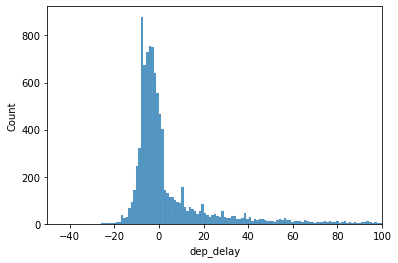

In [555]:
sns.histplot(data)
plt.xlim(-50, 100)

#### the departue delay is not normally distributed. 

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [504]:
import datetime

In [505]:
df_task2=df_flight.copy(deep=True)

In [509]:
df_task2.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-02-15,UA,UA,UA,343,UA,N33103,343,10721,BOS,...,87.0,87.0,51.0,1.0,200.0,21.153562,2.573087,15.94723,0.122955,25.318206
1,2019-05-22,AA,AA_CODESHARE,AA,5299,OH,N725PS,5299,12448,JAN,...,114.0,119.0,86.0,1.0,562.0,37.000000,0.000000,5.00000,0.000000,2.000000
2,2018-08-05,WN,WN,WN,3730,WN,N447WN,3730,12889,LAS,...,185.0,172.0,160.0,1.0,1371.0,21.153562,2.573087,15.94723,0.122955,25.318206
3,2019-03-01,F9,F9,F9,1210,F9,N205FR,1210,15016,STL,...,144.0,152.0,120.0,1.0,882.0,21.153562,2.573087,15.94723,0.122955,25.318206
4,2018-12-08,AA,AA_CODESHARE,AA,5089,OH,N576NN,5089,10821,BWI,...,106.0,79.0,62.0,1.0,361.0,21.153562,2.573087,15.94723,0.122955,25.318206


In [510]:
df_task2['fl_date']=pd.to_datetime(df_task2['fl_date'])
df_task2['month']=df_task2['fl_date'].dt.month


In [513]:
df_mean=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).mean()
df_median=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).median()

In [517]:
df_mean.head()

,dep_delay,arr_delay
month,,
1,9.704427,3.476562
2,11.760174,7.486919
3,8.771887,2.600493
4,8.703008,3.869674
5,7.305556,3.548611


In [515]:
import plotly.express as go 

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

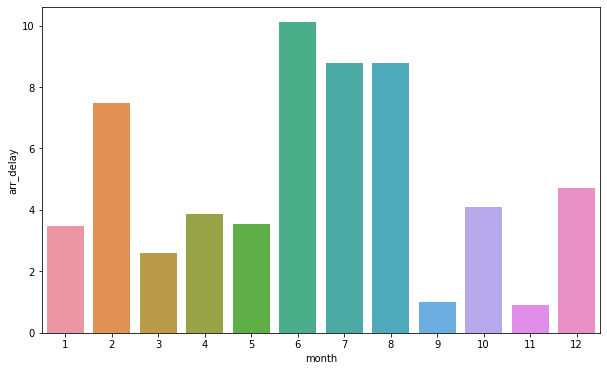

In [570]:
fig=plt.subplots(figsize=(10, 6))

sns.barplot(x=df_mean.index, y=df_mean['arr_delay'])


<AxesSubplot:xlabel='month', ylabel='dep_delay'>

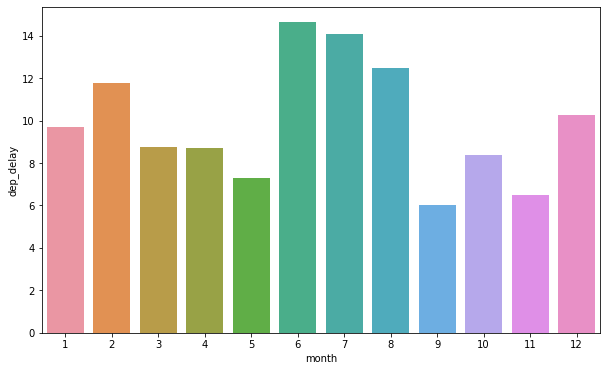

In [571]:
fig=plt.figure(figsize=(10, 6))

sns.barplot(x=df_mean.index, y=df_mean['dep_delay'])


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [704]:
df_task2=df_flight.copy(deep=True)

In [705]:
df_task2.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [528]:
df_task4=df_flight.copy(deep=True)

In [533]:
taxi_out=df_task4.groupby(['origin']).agg({'taxi_out':['count', 'mean']}).reset_index()
taxi_out

origin taxi_out           
              count       mean
0      ABE       12  19.916667
1      ABI        4  15.750000
2      ABQ       35  14.457143
3      ABY        2  18.000000
4      ACT        2  13.000000
..     ...      ...        ...
301    XNA       24  16.625000
302    XWA        1  48.000000
303    YAK        3   6.333333
304    YKM        4   5.250000
305    YUM        1  11.000000

[306 rows x 3 columns]

In [538]:
import plotly.express as go
plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_out[('taxi_out', 'count')], y=taxi_out[('taxi_out', 'mean')], color=taxi_out['origin'])
fig.show()

<Figure size 864x576 with 0 Axes>

In [539]:
taxi_in=df_task4.groupby(['dest']).agg({'taxi_in':['count', 'mean']}).reset_index()

plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_in[('taxi_in', 'count')], y=taxi_in[('taxi_in', 'mean')], color=taxi_in['dest'])
fig.show()

<Figure size 864x576 with 0 Axes>

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [209]:
features = [
 'fl_date',
 'mkt_carrier',
 'dep_delay',
 'taxi_out',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance']
delays = df_flights[features]

In [210]:
delays.head()

,fl_date,mkt_carrier,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-08-30,AA,16.0,25.0,4.0,1303,1317.0,14.0,83.0,81.0,52.0,313.0
1,2018-08-30,AA,35.0,16.0,12.0,749,821.0,32.0,121.0,118.0,90.0,590.0
2,2018-08-30,AA,8.0,11.0,4.0,2116,2133.0,17.0,90.0,99.0,84.0,408.0
3,2018-08-30,AA,-3.0,37.0,3.0,1909,1929.0,20.0,99.0,122.0,82.0,408.0
4,2018-08-30,DL,-8.0,19.0,9.0,1614,1602.0,-12.0,87.0,83.0,55.0,352.0


In [211]:
delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
delays['make_up_times']=''
for i in delays.index:
    if delays._get_value(i, 'dep_delay')>0:
        if delays._get_value(i, 'dep_delay')<=delays._get_value(i, 'arr_delay'):
            delays._set_value(i, 'make_up_times', 'no')
        
        else:
            delays._set_value(i, 'make_up_times', 'yes')
    else:
        delays._set_value(i, 'make_up_times', 'no departure delay')


<ipython-input-211-5286996c2e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
<ipython-input-211-5286996c2e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays['make_up_times']=''


In [212]:
delays.head()

,fl_date,mkt_carrier,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delays_sum,make_up_times
0,2018-08-30,AA,16.0,25.0,4.0,1303,1317.0,14.0,83.0,81.0,52.0,313.0,30.0,yes
1,2018-08-30,AA,35.0,16.0,12.0,749,821.0,32.0,121.0,118.0,90.0,590.0,67.0,yes
2,2018-08-30,AA,8.0,11.0,4.0,2116,2133.0,17.0,90.0,99.0,84.0,408.0,25.0,no
3,2018-08-30,AA,-3.0,37.0,3.0,1909,1929.0,20.0,99.0,122.0,82.0,408.0,17.0,no departure delay
4,2018-08-30,DL,-8.0,19.0,9.0,1614,1602.0,-12.0,87.0,83.0,55.0,352.0,-20.0,no departure delay


In [213]:
delays.groupby('mkt_carrier').count()

,fl_date,dep_delay,taxi_out,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delays_sum,make_up_times
mkt_carrier,,,,,,,,,,,,,
AA,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495,2495
AS,555,555,555,555,555,555,555,555,555,555,555,555,555
B6,244,244,244,244,244,244,244,244,244,244,244,244,244
DL,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188,4188
G4,26,26,26,26,26,26,26,26,26,26,26,26,26
HA,167,167,167,167,167,167,167,167,167,167,167,167,167
NK,234,234,234,234,234,234,234,234,234,234,234,234,234
UA,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890
WN,104,104,104,104,104,104,104,104,104,104,104,104,104


In [214]:
delays['mkt_carrier'].unique()

array(['AA', 'DL', 'B6', 'AS', 'HA', 'UA', 'NK', 'WN', 'G4'], dtype=object)

In [223]:
# airlines that make up for delays

airline_dep_delays={'AA':[0,0,0], 'DL':[0,0,0], 'B6':[0,0,0], 'AS':[0,0,0], 'HA':[0,0,0], 'UA':[0,0,0], 'NK':[0,0,0], 'WN':[0,0,0], 'G4':[0,0,0]}

for i in delays.index:
    if delays._get_value(i, 'make_up_times')=='yes':
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][0] +=1
    
    elif delays._get_value(i, 'make_up_times')=='no':
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][1] +=1
    
    else: 
        airline_dep_delays[dfDelay._get_value(i,'mkt_carrier')][2] +=1
        
#k[0] is when dep_delay is greater than arrival delay but it is managed to arrive shorter delay than the departure
#k[1] is when there is a departure delay but the plane arrives with no delay to its destination.
for j, k in airline_dep_delays.items():
    print(f'{j} is able to make up for departure delay upto: {round(k[0]/(k[0]+k[1])*100)} % of the time') 

AA is able to make up for departure delay upto: 64 % of the time
DL is able to make up for departure delay upto: 81 % of the time
B6 is able to make up for departure delay upto: 77 % of the time
AS is able to make up for departure delay upto: 56 % of the time
HA is able to make up for departure delay upto: 75 % of the time
UA is able to make up for departure delay upto: 60 % of the time
NK is able to make up for departure delay upto: 81 % of the time
WN is able to make up for departure delay upto: 85 % of the time
G4 is able to make up for departure delay upto: 50 % of the time


In [226]:
# Finding the delays when departuring

# k[2] is when the plane leaves without delay

for j, k in airline_dep_delays.items():
    print(f'{j} gets delayed at departure upto: {round((k[0]+k[1])/(k[0]+k[1]+k[2])*100)} % of the time')

AA gets delayed at departure upto: 29 % of the time
DL gets delayed at departure upto: 23 % of the time
B6 gets delayed at departure upto: 30 % of the time
AS gets delayed at departure upto: 23 % of the time
HA gets delayed at departure upto: 7 % of the time
UA gets delayed at departure upto: 28 % of the time
NK gets delayed at departure upto: 29 % of the time
WN gets delayed at departure upto: 44 % of the time
G4 gets delayed at departure upto: 31 % of the time


#### **Task 6**: How many states cover 50% of US air traffic? 

In [337]:
df_task6=df_flights.copy(deep=True)

In [338]:
df_task6.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [339]:
#There is no column for for states, but we can use the columns for origin and destination cities
df_task6[['origin_city_name', 'dest_city_name']].head()

,origin_city_name,dest_city_name
0,"Washington, DC","Houston, TX"
1,"Washington, DC","Columbus, OH"
2,"Houston, TX","Omaha, NE"
3,"Houston, TX","Louisville, KY"
4,"Phoenix, AZ","Yuma, AZ"


In [340]:
#Spliting the codes from state's name
df_task6['origin_state']=df_task6['origin_city_name'].apply(lambda x: x.split(', ')[1])
df_task6['destination_state']=df_task6['dest_city_name'].apply(lambda x: x.split(', ')[1])
df_task6.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,origin_state,destination_state
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,154.0,1.0,1208.0,20.0,0.0,0.0,0.0,0.0,DC,TX
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,49.0,1.0,299.0,20.0,0.0,0.0,0.0,0.0,DC,OH
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,97.0,1.0,781.0,18.0,0.0,0.0,0.0,0.0,TX,NE
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,107.0,1.0,788.0,16.0,0.0,0.0,0.0,0.0,TX,KY
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,33.0,1.0,160.0,0.0,0.0,7.0,0.0,22.0,AZ,AZ


In [341]:
# counting the number of flights based on origin and destination
flights_per_state_origin=df_task6.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
flights_per_state_destination=df_task6.groupby('destination_state')['fl_date'].count().sort_values(ascending=False)

Text(0, 0.5, 'Origin State')

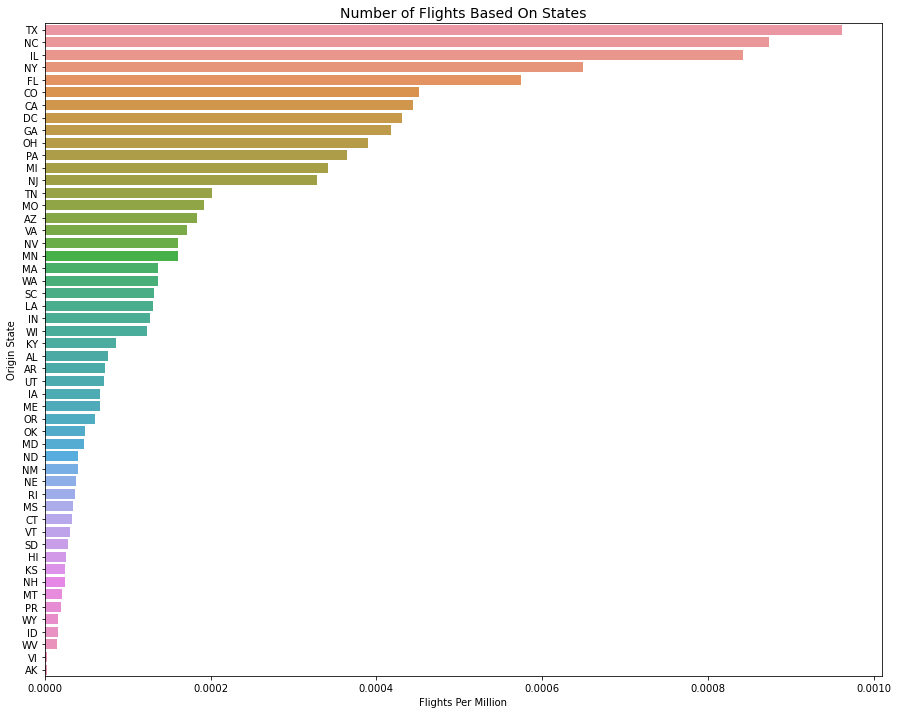

In [342]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_origin.values/million, y=flights_per_state_origin.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Origin State')




Text(0, 0.5, 'Destination State')

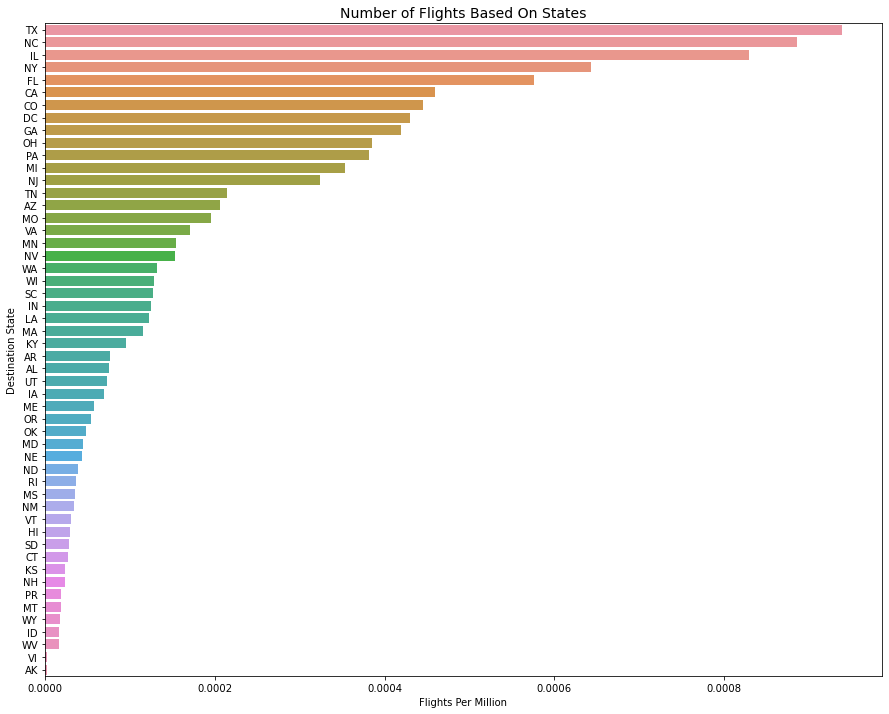

In [343]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_destination/million, y=flights_per_state_destination.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Destination State')

In [344]:
#Counting the top states with most air traffic in the US
total_flights=flights_per_state_origin + flights_per_state_destination
flight_perc=total_flights.sum()*0.5
states=[]
total=0
num=False

In [345]:
for state, number in total_flights.sort_values(ascending=False).items():
    if total<=flight_perc:
        states.append(state)
        total +=number
        
    if total > flight_perc:
        num =True
    
    elif num == True:
        break

print('States that cover 50% of US Air Traffic:')
for state in states:
    print(state)

States that cover 50% of US Air Traffic:
TX
NC
IL
NY
FL
CA
CO
DC


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [540]:
df_task7=df_flight.copy(deep=True)
df_task7.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-02-15,UA,UA,UA,343,UA,N33103,343,10721,BOS,...,87.0,87.0,51.0,1.0,200.0,21.153562,2.573087,15.94723,0.122955,25.318206
1,2019-05-22,AA,AA_CODESHARE,AA,5299,OH,N725PS,5299,12448,JAN,...,114.0,119.0,86.0,1.0,562.0,37.000000,0.000000,5.00000,0.000000,2.000000
2,2018-08-05,WN,WN,WN,3730,WN,N447WN,3730,12889,LAS,...,185.0,172.0,160.0,1.0,1371.0,21.153562,2.573087,15.94723,0.122955,25.318206
3,2019-03-01,F9,F9,F9,1210,F9,N205FR,1210,15016,STL,...,144.0,152.0,120.0,1.0,882.0,21.153562,2.573087,15.94723,0.122955,25.318206
4,2018-12-08,AA,AA_CODESHARE,AA,5089,OH,N576NN,5089,10821,BWI,...,106.0,79.0,62.0,1.0,361.0,21.153562,2.573087,15.94723,0.122955,25.318206


In [542]:
df_task7['air_time'].sort_values(ascending=False)

8623    587.0
2103    531.0
1280    506.0
378     484.0
9452    478.0
        ...  
3003     16.0
4816     15.0
690      14.0
8150     12.0
6049      9.0
Name: air_time, Length: 9769, dtype: float64

In [545]:
df_task7['flight_speed']=(df_task7['distance']/df_task7['air_time'])*60

In [547]:
df_task7['flight_speed'].sort_values(ascending=False)

5916    616.416465
5995    602.188450
2262    592.994924
7028    592.957746
4414    592.857143
           ...    
3485    148.235294
598     120.895522
2067    120.000000
1777    119.172414
9354    110.769231
Name: flight_speed, Length: 9769, dtype: float64

In [549]:
#flight speed with and without delays
flightspeed_with_delay=df_task7.loc[(df_task7['dep_delay']>0), 'flight_speed']
flightspeed_without_delay=df_task7.loc[(df_task7['dep_delay']==0), 'flight_speed']

In [550]:
stats.f_oneway(flightspeed_with_delay, flightspeed_without_delay)

F_onewayResult(statistic=0.5737445425144778, pvalue=0.4488218742807767)

In [552]:
stats.ttest_ind(flightspeed_with_delay, flightspeed_without_delay)

Ttest_indResult(statistic=0.7574592678913441, pvalue=0.4488218742798189)

Result: The null hypothesis is not rejected because the P-value is greater than alpha. 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [415]:
df_task8=df_flights.copy(deep=True)
df_task8.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [416]:
df_task8.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019-10-01,UA,UA_CODESHARE,UA,6312,YV,N88331,6312,11278,DCA,...,207.0,174.0,154.0,1.0,1208.0,20.0,0.0,0.0,0.0,0.0
1,2019-10-01,UA,UA_CODESHARE,UA,6248,YV,N521LR,6248,12264,IAD,...,79.0,72.0,49.0,1.0,299.0,20.0,0.0,0.0,0.0,0.0
2,2019-10-01,UA,UA_CODESHARE,UA,6186,YV,N87345,6186,12266,IAH,...,133.0,114.0,97.0,1.0,781.0,18.0,0.0,0.0,0.0,0.0
3,2019-10-01,UA,UA_CODESHARE,UA,6253,YV,N85358,6253,12266,IAH,...,141.0,126.0,107.0,1.0,788.0,16.0,0.0,0.0,0.0,0.0
4,2019-10-01,AA,AA_CODESHARE,AA,5710,YV,N912FJ,5710,14107,PHX,...,57.0,64.0,33.0,1.0,160.0,0.0,0.0,7.0,0.0,22.0


In [417]:

#convert to datetime
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [418]:
#get dep_hr again
df_task8['fl_date'] = pd.to_datetime(df_task8['fl_date'], format='%Y-%m-%d')

df_task8['dep_time'] = df_task8['dep_time'].apply(lambda x: convert_time(x))
df_task8['dep_time'] = pd.to_datetime(df_task8['dep_time'], format='%H:%M')
df_task8['dep_hr'] = df_task8['dep_time'].dt.hour

In [419]:
#short flights:30 mins to 3 hours
#medium flights: 3 hourst to 6 hours
#long flights: above 6 hours
short_flights=df_task8[df_task8['air_time']<=180]
medium_flights=df_task8[(df_task8['air_time']> 180) & (df_task8['air_time']<=360)]
long_flights=df_task8[df_task8['air_time']>=360]

In [420]:
short_time=short_flights.groupby(by=[short_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
med_time=medium_flights.groupby(by=[medium_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
long_time=long_flights.groupby(by=[long_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)

Text(0, 0.5, 'Number of flights')

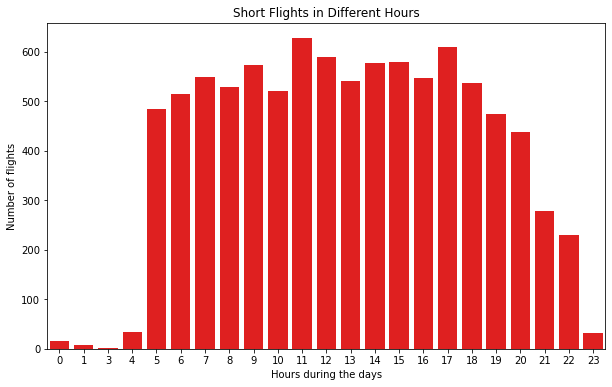

In [423]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=short_time.index, y=short_time.values, color='r')
ax.set_title('Short Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

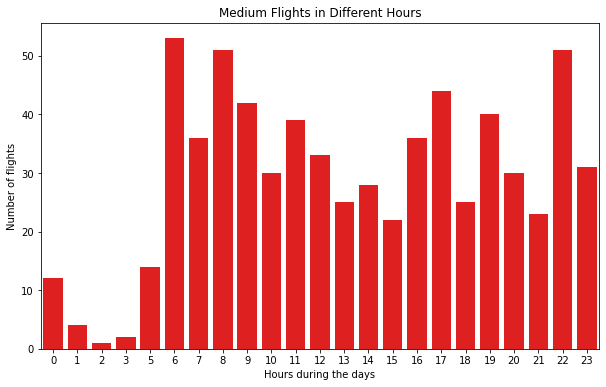

In [424]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=med_time.index, y=med_time.values, color='r')
ax.set_title('Medium Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

Text(0, 0.5, 'Number of flights')

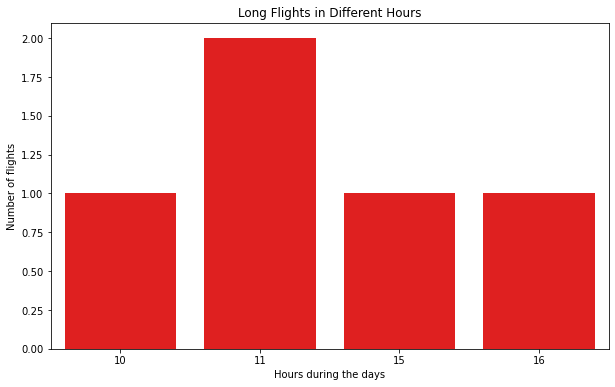

In [425]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=long_time.index, y=long_time.values, color='r')
ax.set_title('Long Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [577]:
df_pas=pd.read_sql_query('''SELECT * FROM passengers ORDER BY RANDOM() LIMIT 10000;''', cnx)

In [582]:
df_task9=df_pas.copy(deep=True)

In [589]:
df_task9.columns

Index(['departures_scheduled', 'departures_performed', 'payload', 'seats',
       'passengers', 'freight', 'mail', 'distance', 'ramp_to_ramp', 'air_time',
       'unique_carrier', 'airline_id', 'unique_carrier_name', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_city_market_id', 'origin',
       'origin_city_name', 'origin_country', 'origin_country_name',
       'dest_airport_id', 'dest_city_market_id', 'dest', 'dest_city_name',
       'dest_country', 'dest_country_name', 'aircraft_group', 'aircraft_type',
       'aircraft_config', 'year', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')

In [583]:
df_task9['dest']

0       ATL
1       COS
2       ROW
3       ATL
4       WLK
       ... 
9995    ATL
9996    MIA
9997    STP
9998    ATL
9999    BOI
Name: dest, Length: 10000, dtype: object

In [590]:
busy_airports_dest=df_task9[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [595]:
busy_airports_dest=busy_airports_dest.sort_values(by='passengers', ascending=False).head(10)
busy_airports_dest

,dest,passengers
56,ATL,1114401.0
549,ORD,838506.0
413,LAX,732962.0
189,DFW,722954.0
187,DEN,690086.0
676,SFO,605286.0
354,JFK,600967.0
153,CLT,550076.0
674,SEA,517315.0
412,LAS,492800.0


Text(0, 0.5, 'Number of Passengers')

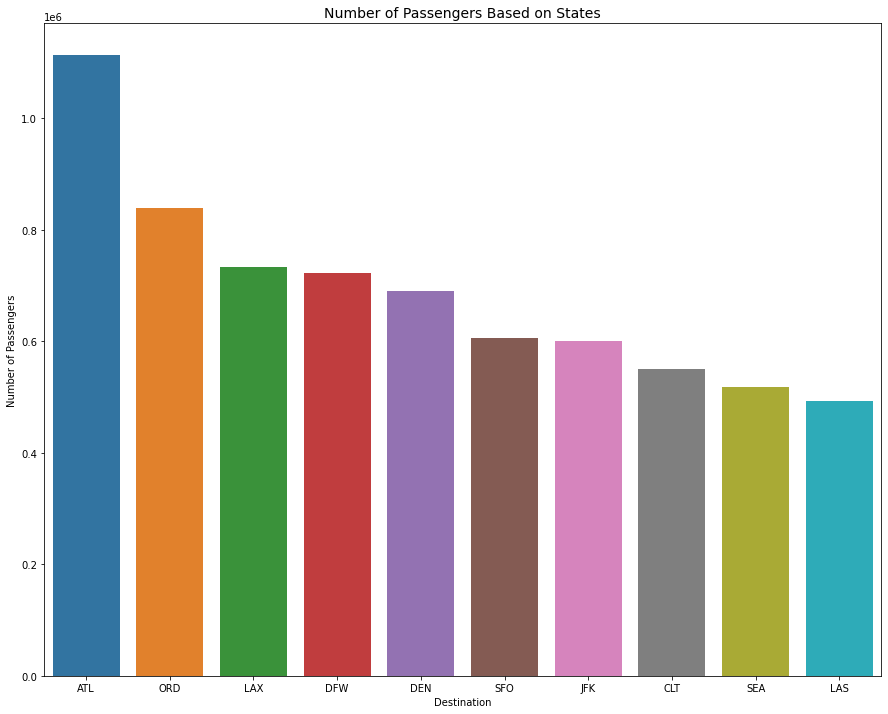

In [596]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_dest.dest, y=busy_airports_dest.passengers)
ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Destination')
ax.set_ylabel('Number of Passengers')

In [597]:
busy_airports_origin=df_task9[['passengers', 'origin']].groupby('origin').sum().reset_index()
busy_airports_origin=busy_airports_origin.sort_values(by='passengers', ascending=False).head(10)
busy_airports_origin

,origin,passengers
45,ATL,978224.0
550,ORD,884806.0
175,DFW,840136.0
405,LAX,723163.0
350,JFK,703789.0
674,SFO,639302.0
174,DEN,584107.0
583,PHX,557607.0
224,EWR,536112.0
457,MCO,482366.0


Text(0, 0.5, 'Number of Passengers')

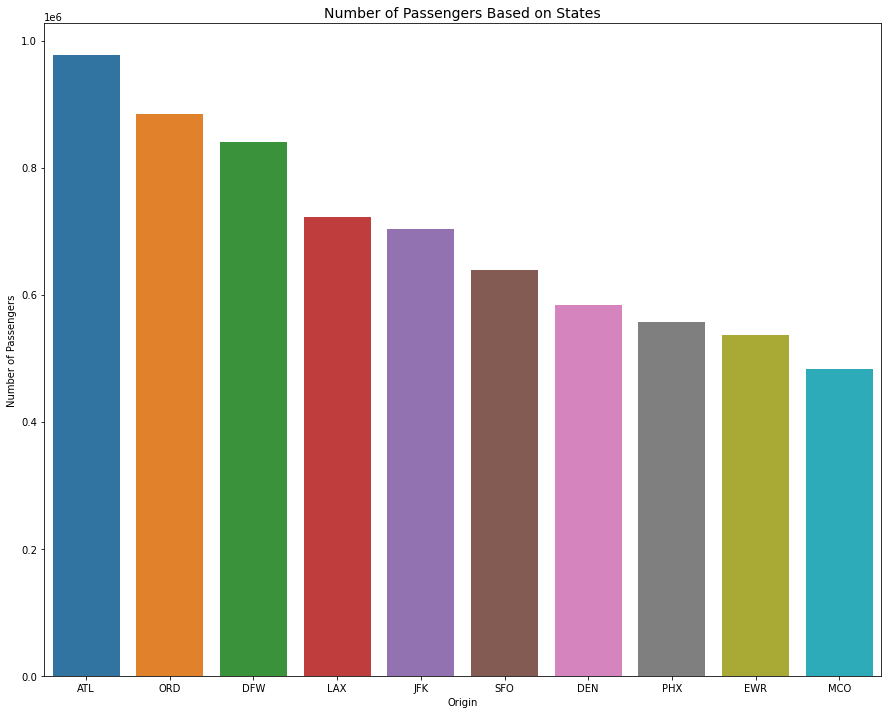

In [605]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_origin.origin, y=busy_airports_origin.passengers)

ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Origin')
ax.set_ylabel('Number of Passengers')

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [672]:
df_fuel=pd.read_csv('fuel.csv')
df_fuel.head()

,Unnamed: 0,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,396216.0,140239.0,536455.0,2016
1,2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
2,3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016
3,4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,...,522405.0,0.0,0.0,0.0,0.0,522405.0,569497.0,0.0,569497.0,2016
4,5,1,19917.0,5X,5X,United Parcel Service,3,32138000.0,9743000.0,16116000.0,...,34098000.0,9752000.0,17965000.0,3524000.0,31241000.0,65339000.0,34098000.0,31241000.0,65339000.0,2016


In [673]:
df_fuel.isnull().sum()

Unnamed: 0           0
month                0
airline_id           0
unique_carrier       0
carrier              0
carrier_name         0
carrier_group_new    0
sdomt_gallons        0
satl_gallons         0
spac_gallons         0
slat_gallons         0
sint_gallons         0
ts_gallons           0
tdomt_gallons        0
tint_gallons         0
total_gallons        0
sdomt_cost           0
satl_cost            0
spac_cost            0
slat_cost            0
sint_cost            0
ts_cost              0
tdomt_cost           0
tint_cost            0
total_cost           0
year                 0
dtype: int64

In [674]:
df_task10=df_flight.copy(deep=True)

In [675]:
df_task10['fl_date']=pd.to_datetime(df_task2['fl_date'])
df_task10['month']=df_task2['fl_date'].dt.month

In [676]:
#Average delays and distance covered by carriers
monthly_delay=df_task10.groupby(['month', 'mkt_unique_carrier'])['dep_delay'].mean()
monthly_distance=df_task10.groupby(['month','mkt_unique_carrier'])['distance'].sum()


In [677]:
monthly_delay

month  mkt_unique_carrier
1      AA                     7.980296
       AS                     0.075000
       B6                    30.125000
       DL                     4.191083
       F9                    10.666667
                               ...    
12     G4                    21.700000
       HA                     3.500000
       NK                     3.833333
       UA                    20.261745
       WN                    11.420290
Name: dep_delay, Length: 123, dtype: float64

In [678]:
df_task10_pas=df_pas.copy(deep=True)

In [679]:
df_task10.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'month'],
      dtype='object')

In [680]:
#Number of passengers carreid by all carriers
pas_by_carriers=df_task10_pas[['passengers','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='passengers', ascending=False)
pas_by_carriers

,passengers
unique_carrier,
WN,3325621.0
AA,3114535.0
DL,2995752.0
UA,2119177.0
B6,798111.0
...,...
PO,0.0
PM,0.0
2GQ,0.0


In [681]:
#total fuel consumption per carrir 
fuel_by_carriers=df_fuel[['total_gallons','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='total_gallons', ascending=False)
fuel_by_carriers


,total_gallons
unique_carrier,
AA,1.663489e+10
DL,1.627476e+10
UA,1.566815e+10
WN,9.423150e+09
FX,5.354409e+09
...,...
9E,0.000000e+00
OH,0.000000e+00
CP,0.000000e+00


In [682]:
#Merging

delay_dest_merged=pd.merge(monthly_delay, monthly_distance, how='left', on=['mkt_unique_carrier', 'month']).reset_index()
delay_dest_merged

,mkt_unique_carrier,month,dep_delay,distance
0,AA,1,7.980296,140007.0
1,AS,1,0.075000,28992.0
2,B6,1,30.125000,30730.0
3,DL,1,4.191083,96245.0
4,F9,1,10.666667,14942.0
...,...,...,...,...
118,G4,12,21.700000,9184.0
119,HA,12,3.500000,13851.0
120,NK,12,3.833333,26411.0
121,UA,12,20.261745,130261.0


In [689]:
delay_dest_merged=delay_dest_merged.rename(columns={'mkt_unique_carrier': 'unique_carrier'})

In [690]:
pas_fuel_merged=pd.merge(pas_by_carriers, fuel_by_carriers, how='left', on='unique_carrier').reset_index()
pas_fuel_merged

,unique_carrier,passengers,total_gallons
0,WN,3325621.0,9.423150e+09
1,AA,3114535.0,1.663489e+10
2,DL,2995752.0,1.627476e+10
3,UA,2119177.0,1.566815e+10
4,B6,798111.0,3.767060e+09
...,...,...,...
263,PO,0.0,8.582394e+08
264,PM,0.0,NaN
265,2GQ,0.0,NaN
266,2F,0.0,NaN


In [691]:
fuel_pass = pd.merge(delay_dest_merged, pas_fuel_merged, how = 'right', on = 'unique_carrier')
fuel_pass


,unique_carrier,month,dep_delay,distance,passengers,total_gallons
0,AA,1.0,7.980296,140007.0,3114535.0,1.663489e+10
1,AA,2.0,8.404372,132460.0,3114535.0,1.663489e+10
2,AA,3.0,8.574074,148297.0,3114535.0,1.663489e+10
3,AA,4.0,5.132353,140466.0,3114535.0,1.663489e+10
4,AA,5.0,11.763889,138070.0,3114535.0,1.663489e+10
...,...,...,...,...,...,...
375,PO,NaN,NaN,NaN,0.0,8.582394e+08
376,PM,NaN,NaN,NaN,0.0,NaN
377,2GQ,NaN,NaN,NaN,0.0,NaN
378,2F,NaN,NaN,NaN,0.0,NaN


In [695]:
fuel_pass=fuel_pass.dropna()

In [699]:
fuel_pass['fuel consumpter per passenger']=fuel_pass['total_gallons']/fuel_pass['passengers']
fuel_pass['consumption per km']=fuel_pass['total_gallons']/fuel_pass['distance']

<ipython-input-699-5680e5261f02>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-699-5680e5261f02>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [700]:
fuel_pass.head()

,unique_carrier,month,dep_delay,distance,passengers,total_gallons,fuel consumpter per passenger,consumption per km
0,AA,1.0,7.980296,140007.0,3114535.0,1.663489e+10,5341.049774,118814.676823
1,AA,2.0,8.404372,132460.0,3114535.0,1.663489e+10,5341.049774,125584.225109
2,AA,3.0,8.574074,148297.0,3114535.0,1.663489e+10,5341.049774,112172.777993
3,AA,4.0,5.132353,140466.0,3114535.0,1.663489e+10,5341.049774,118426.426737
4,AA,5.0,11.763889,138070.0,3114535.0,1.663489e+10,5341.049774,120481.541667


<AxesSubplot:xlabel='dep_delay', ylabel='fuel consumpter per passenger'>

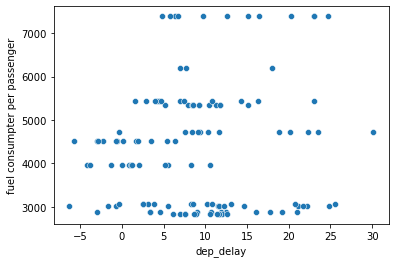

In [702]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='fuel consumpter per passenger')

<AxesSubplot:xlabel='dep_delay', ylabel='consumption per km'>

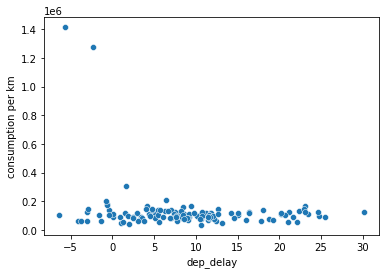

In [703]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='consumption per km')